<a href="https://colab.research.google.com/github/mk7890/Machine-Learning-1/blob/main/ML_1_Logistic_Regression_heartAttackDataset_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer


Load Heart attack dataset

In [108]:
heart_attack = pd.read_csv("/content/heartCleanData.csv")
heart_attack.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,None of them,No,...,1.705048,79.38,27.12,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,No,6.0,None of them,No,...,1.600000,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,None of them,No,...,1.570000,63.50,25.61,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.650000,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.570000,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


Getting to know the dataset


In [109]:
heart_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47297 entries, 0 to 47296
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      47297 non-null  object 
 1   Sex                        47297 non-null  object 
 2   GeneralHealth              47297 non-null  object 
 3   PhysicalHealthDays         47297 non-null  float64
 4   MentalHealthDays           47297 non-null  float64
 5   LastCheckupTime            47297 non-null  object 
 6   PhysicalActivities         47297 non-null  object 
 7   SleepHours                 47297 non-null  float64
 8   RemovedTeeth               47297 non-null  object 
 9   HadHeartAttack             47297 non-null  object 
 10  HadAngina                  47297 non-null  object 
 11  HadStroke                  47297 non-null  object 
 12  HadAsthma                  47297 non-null  object 
 13  HadSkinCancer              47297 non-null  obj

In [110]:
heart_attack.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,0
PhysicalActivities,0
SleepHours,0
RemovedTeeth,0
HadHeartAttack,0


In [111]:
# delete rows with empty data cells
heart_attack.dropna(inplace=True)
heart_attack.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,0
PhysicalActivities,0
SleepHours,0
RemovedTeeth,0
HadHeartAttack,0


In [112]:
# dropping unnecessary columns
columns_to_drop = ['MentalHealthDays','LastCheckupTime', 'RemovedTeeth', 'HadSkinCancer', 'HadDepressiveDisorder',
                   'HadArthritis', 'DeafOrHardOfHearing', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
                   'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
                   'HeightInMeters', 'WeightInKilograms', 'HIVTesting', 'TetanusLast10Tdap',]
heart_attack.drop(columns=columns_to_drop, inplace=True)
heart_attack.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'PhysicalActivities', 'SleepHours', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadCOPD', 'HadKidneyDisease', 'HadDiabetes',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'BMI', 'AlcoholDrinkers', 'FluVaxLast12',
       'PneumoVaxEver', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

# DATA ANALYSIS

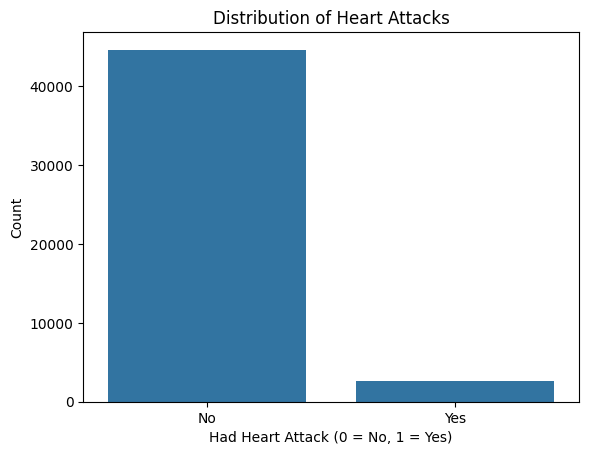

In [113]:
# Count plot for binary data
sns.countplot(x='HadHeartAttack', data=heart_attack)
plt.title('Distribution of Heart Attacks')
plt.xlabel('Had Heart Attack (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

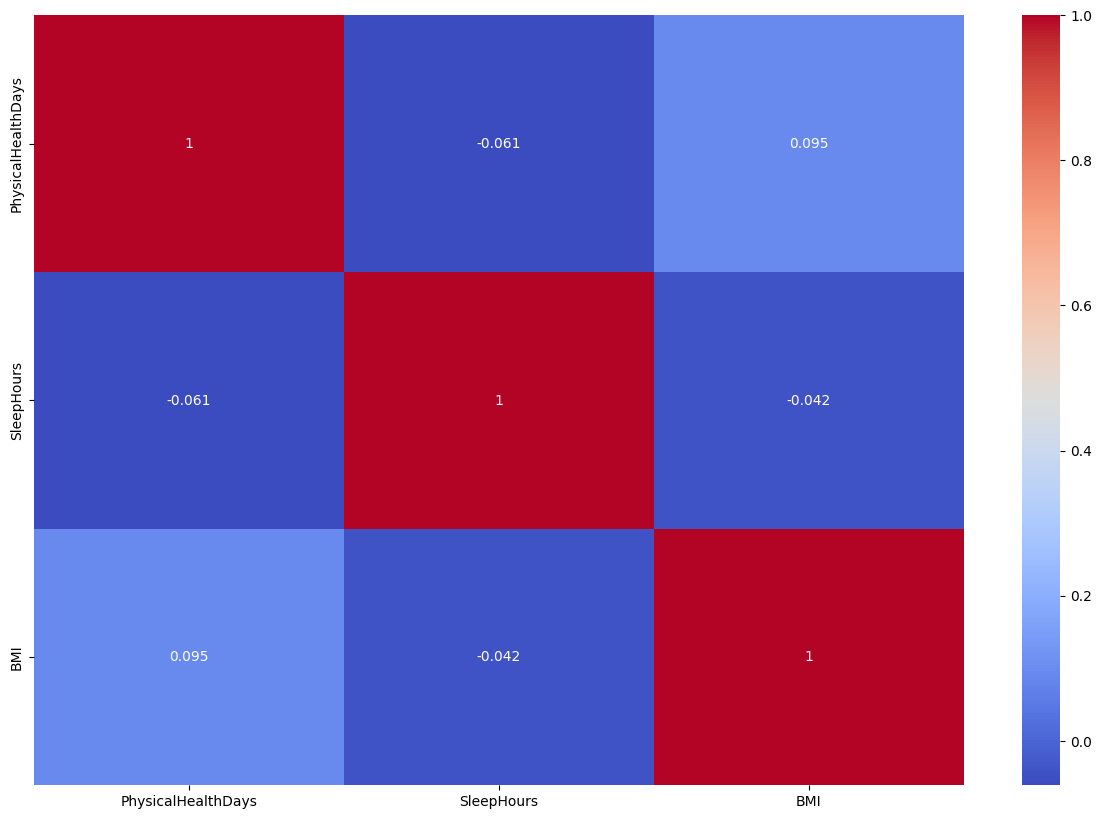

In [114]:
# Select only float or integer columns
numeric_data = heart_attack.select_dtypes(include=['float64', 'int64'])

# Plot heatmap for the correlation matrix of numeric columns
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=True)
plt.show()

# DATASET ENCODING FOR CATEGORICAL COLUMNS

In [115]:
'''
columns = ['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'PhysicalActivities', 'SleepHours',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD',
       'HadKidneyDisease', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage',
       'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'BMI',
       'AlcoholDrinkers', 'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear',
       'CovidPos']

Label encoding: State, PhysicalHealthDays,SleepHours, AgeCategory, BMI,
One hot encoding: Sex, GeneralHealth, PhysicalActivities, HadHeartAttack, HadAngina, HadStroke, HadAsthma, HadCOPD,
       HadKidneyDisease, HadDiabetes, SmokerStatus, ECigaretteUsage, ChestScan, RaceEthnicityCategory, AlcoholDrinkers,
       FluVaxLast12, PneumoVaxEver, HighRiskLastYear, CovidPos

'''
heart_attack['CovidPos'].value_counts()

,count
CovidPos,
No,33893
Yes,11918
Tested positive using home test without a health professional,1486


In [116]:
from sklearn.preprocessing import LabelEncoder

label_columns = ['State', 'AgeCategory']
label_encoders = {}

for col in label_columns:
    le = LabelEncoder()
    heart_attack[col] = le.fit_transform(heart_attack[col])
    label_encoders[col] = le

# Exclude columns already label-encoded
one_hot_columns = [col for col in heart_attack.columns if col not in label_columns and heart_attack[col].dtype == 'object']
# One-hot encode
heart_attack = pd.get_dummies(heart_attack, columns=one_hot_columns, drop_first=True)
heart_attack.head()

,State,PhysicalHealthDays,SleepHours,AgeCategory,BMI,Sex_Male,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,...,RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",AlcoholDrinkers_Yes,FluVaxLast12_Yes,PneumoVaxEver_Yes,HighRiskLastYear_Yes,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,0,0.0,8.0,12,27.12,False,False,False,False,True,...,False,False,False,True,False,True,False,False,False,False
1,0,0.0,6.0,12,26.57,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0,2.0,5.0,7,25.61,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
3,0,0.0,7.0,9,23.30,False,False,False,False,False,...,False,False,False,True,False,True,True,False,False,False
4,0,2.0,9.0,4,21.77,False,True,False,False,False,...,False,False,False,True,True,False,True,False,False,False


In [117]:
# convert columns with boolean True of False to 1 or 0
bool_columns = heart_attack.select_dtypes(include='bool').columns
# Convert boolean columns to integers
heart_attack[bool_columns] = heart_attack[bool_columns].astype(int)
heart_attack.head()

,State,PhysicalHealthDays,SleepHours,AgeCategory,BMI,Sex_Male,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,...,RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",AlcoholDrinkers_Yes,FluVaxLast12_Yes,PneumoVaxEver_Yes,HighRiskLastYear_Yes,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,0,0.0,8.0,12,27.12,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1,0,0.0,6.0,12,26.57,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,2.0,5.0,7,25.61,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,0,0.0,7.0,9,23.30,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
4,0,2.0,9.0,4,21.77,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0


# LOGISTIC REGRESSION MODELING

In [118]:
heart_attack.columns

Index(['State', 'PhysicalHealthDays', 'SleepHours', 'AgeCategory', 'BMI',
       'Sex_Male', 'GeneralHealth_Fair', 'GeneralHealth_Good',
       'GeneralHealth_Poor', 'GeneralHealth_Very good',
       'PhysicalActivities_Yes', 'HadHeartAttack_Yes', 'HadAngina_Yes',
       'HadStroke_Yes', 'HadAsthma_Yes', 'HadCOPD_Yes', 'HadKidneyDisease_Yes',
       'HadDiabetes_No, pre-diabetes or borderline diabetes',
       'HadDiabetes_Yes',
       'HadDiabetes_Yes, but only during pregnancy (female)',
       'SmokerStatus_Current smoker - now smokes some days',
       'SmokerStatus_Former smoker', 'SmokerStatus_Never smoked',
       'ECigaretteUsage_Not at all (right now)',
       'ECigaretteUsage_Use them every day',
       'ECigaretteUsage_Use them some days', 'ChestScan_Yes',
       'RaceEthnicityCategory_Hispanic',
       'RaceEthnicityCategory_Multiracial, Non-Hispanic',
       'RaceEthnicityCategory_Other race only, Non-Hispanic',
       'RaceEthnicityCategory_White only, Non-Hispanic', 'Alc

# **Splitting data into train and test datasets**

In [132]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  'HadHeartAttack_Yes' is the target column
X = heart_attack.drop(columns=['HadHeartAttack_Yes'])  # Features
y = heart_attack['HadHeartAttack_Yes']  # Target


In [133]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


FEATURE SCALING

In [134]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Modelling: Logistic Regression**

In [135]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [136]:
# Make predictions
y_pred = model.predict(X_test_scaled)


# Model Evaluation

In [140]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix: A confusion matrix is a tool in machine learning \n that shows how well a classification model performs by comparing predicted values to actual values")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9447

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8924
           1       0.53      0.20      0.29       536

    accuracy                           0.94      9460
   macro avg       0.74      0.59      0.63      9460
weighted avg       0.93      0.94      0.93      9460


Confusion Matrix: A confusion matrix is a tool in machine learning 
 that shows how well a classification model performs by comparing predicted values to actual values
[[8831   93]
 [ 430  106]]
